# Play Around MNIST Number and Fashion

Dataset Number: [link](http://yann.lecun.com/exdb/mnist/)

Dataset Fashion: [link](https://github.com/zalandoresearch/fashion-mnist)

Tutorial: [clumsy computer](https://www.youtube.com/watch?v=vzabeKdW9tE&ab_channel=clumsycomputer)

*As usual dataset, test, and validate will not be pushed into Github*

In [1]:
# This actually not inside the video, it just for validation by visualizing it

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
DEBUG = True

if DEBUG:
    from PIL import Image
    import numpy as np

    def read_image(path):
        return np.asarray(Image.open(path).convert('L'))

    def write_image(image, path):
        img = Image.fromarray(np.array(image), 'L')
        img.save(path)


In [21]:
data_dir = 'dataset/'
test_dir = 'test/'
validate_dir = 'validate/'
dataset = 'number' # number/fashion

test_data_file = data_dir + dataset + '/t10k-images.idx3-ubyte'
test_label_file = data_dir + dataset + '/t10k-labels.idx1-ubyte'
train_data_file = data_dir + dataset + '/train-images.idx3-ubyte'
train_label_file = data_dir + dataset + '/train-labels.idx1-ubyte'

In [4]:
def bytes_to_int(byte_data):
    return int.from_bytes(byte_data, 'big')

In [5]:
def read_img(filename, n_max_images=None):
    images = []
    with open(filename, 'rb') as f:
        _ = f.read(4)  # magic number
        n_images = bytes_to_int(f.read(4))
        if n_max_images:
            n_images = n_max_images
        n_rows = bytes_to_int(f.read(4))
        n_columns = bytes_to_int(f.read(4))
        for image_idx in range(n_images):
            image = []
            for row_idx in range(n_rows):
                row = []
                for col_idx in range(n_columns):
                    pixel = f.read(1)
                    row.append(pixel)
                image.append(row)
            images.append(image)
    return images

In [6]:
def read_labels(filename, n_max_labels=None):
    labels = []
    with open(filename, 'rb') as f:
        _ = f.read(4)  # magic number
        n_labels = bytes_to_int(f.read(4))
        if n_max_labels:
            n_labels = n_max_labels
        for label_idx in range(n_labels):
            label = bytes_to_int(f.read(1))
            labels.append(label)
    return labels

In [7]:
def flatten_list(l):
    return [pixel for sublist in l for pixel in sublist]

In [8]:
def extract_features(X):
    return [flatten_list(sample) for sample in X]

In [9]:
def dist(X, y):
    return sum(
        [
            (bytes_to_int(X_i) - bytes_to_int(y_i)) ** 2
            for X_i, y_i in zip(X, y)
        ]
    ) ** (0.5)

In [10]:
def get_training_distances_for_test_sample(X_train, test_sample):
    return [dist(train_sample, test_sample) for train_sample in X_train]

In [11]:
def get_most_frequent_element(l):
    return max(l, key=l.count)

In [12]:
def knn(X_train, y_train, X_test, k=3):
    y_pred = []
    for test_sample_idx, test_sample in enumerate(X_test):
        training_distances = get_training_distances_for_test_sample(
            X_train, test_sample
        )
        sorted_distance_indices = [
            pair[0]
            for pair in sorted(
                enumerate(training_distances),
                key=lambda x:x[1]
            )
        ]
        candidates = [
            y_train[idx]
            for idx in sorted_distance_indices[:k]
        ]

        top_candidate = get_most_frequent_element(candidates)
        y_pred.append(top_candidate)
    return y_pred

In [13]:
def get_garment_from_label(label):
    return [
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot",
    ][label]

In [22]:
def main():
    X_train = read_img(train_data_file, 1000)
    X_test = read_img(test_data_file, 10)
    y_train = read_labels(train_label_file, 1000)
    y_test = read_labels(test_label_file, 10)

    if DEBUG:
        for idx, test_sample in enumerate(X_test):
            write_image(test_sample, f"{test_dir}{idx}.png")

            ## If want using the validation image written by yours
            if dataset == 'number':
                X_test = [read_image(f"{validate_dir}test2.png")]
                y_test = [4]
            else:
                pass

    X_train = extract_features(X_train)
    X_test = extract_features(X_test)

    y_pred = knn(X_train, y_train, X_test, 7)

    accuracy = sum([
        int(y_pred_i == y_test_i)
        for y_pred_i, y_test_i
        in zip(y_pred, y_test)
    ]) / len(y_test)

    if dataset == 'fashion':
        garment_pred = [
            get_garment_from_label(label)
            for label in y_pred
        ]
        print(f"Predicted garments: {garment_pred}")
    else:
        print(f"Predicted labels: {y_pred}")

    print(f"Accuracy: {accuracy * 100}%")



In [23]:
if __name__ == '__main__':
    main()

Predicted labels: [4]
Accuracy: 100.0%


## Display the Image

In [16]:
img = mpimg.imread('validate/test2.png')

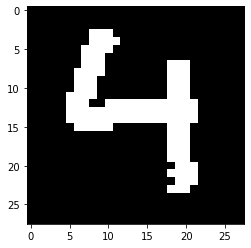

In [17]:

imgplot = plt.imshow(img)
plt.show()